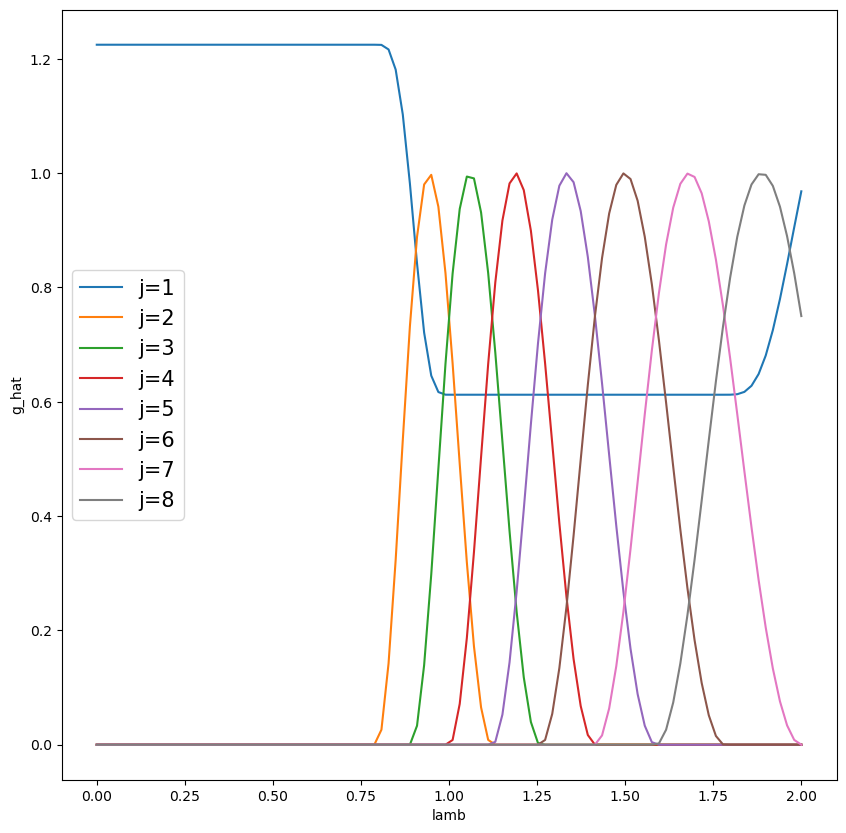

In [21]:

"""
ACMS 80770-03: Deep Learning with Graphs
Instructor: Navid Shervani-Tabar
Fall 2022
University of Notre Dame
Homework 4: Programming assignment
Problem 1
"""
import torch
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=UserWarning)


class kernel:
    def __init__(self, K, R, d, J, lamb_max):
        # -- filter properties
        self.R = float(R)
        self.J = J
        self.K = K
        self.d = d
        self.lamb_max = torch.tensor(lamb_max)

        # -- Half-Cosine kernel
        self.a = torch.tensor(self.R)*torch.log(self.lamb_max)/(self.J-self.R+1)
    
    #define the g hat function
    def g_hat(self,lamb):
        res = torch.tensor(0.)
        for k in range(self.K+1):
            if (lamb>-1*self.a) and (lamb<=0):
                res += self.d[k]*torch.cos(2*torch.pi*k*(lamb/self.a+0.5))
        return res 


    def wavelet(self, lamb, j):
        """
            constructs wavelets ($j\in [2, J]$).
        :param lamb: eigenvalue (analogue of frequency)
        :param j: filter index in the filter bank.
        :return: filter response to input eigenvalues.
        """
        return self.g_hat(torch.log(lamb)-self.a*(j-1)/self.R)

    def scaling(self, lamb):
        """
            constructs scaling function (j=1).
        :param lamb: eigenvalue (analogue of frequency).
        :return: filter response to input eigenvalues.
        """
        sum = torch.tensor(0.)
        for k in range(self.K+1):
          sum += self.R/2*self.d[k]**2
        sum += self.R*self.d[0]**2
        for j in range(2,self.J+1):
          sum -= self.wavelet(lamb,j)**2
        
        return torch.sqrt(sum)



# -- define filter-bank
lamb_max = 2
J = 8
filter_bank = kernel(K=1, R=3, d=[0.5, 0.5], J=J, lamb_max=lamb_max)

# -- plot filters
fig, ax = plt.subplots(figsize=(10, 10))
categories = [f'j={j}' for j in range(1,J+1)]

for j in range(1,J+1):
  lam_range = torch.linspace(0,lamb_max,100)
  if j==1:
    y = [filter_bank.scaling(lamb) for lamb in lam_range]
  else:
    y = [filter_bank.wavelet(lamb,j) for lamb in lam_range]
  ax.plot(lam_range,y,label=categories[j-1])

ax.set_xlabel('lamb')
ax.set_ylabel('g_hat')
ax.legend(categories, prop={"size":15})